# Telco customer churn prediction #

## Initial exploration ##

Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [2]:
# Uncomment if executed in Google Collab
# from google.colab import drive
# drive.mount('/content/gdrive')
# cwd = pathlib.Path("/content/gdrive/MyDrive/telco_customer_churn_prediction/")
# cwd

In [3]:
cwd= pathlib.Path.cwd()

In [4]:
df= pd.read_csv(cwd / "Telco-Customer-Churn.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.shape

(7032, 21)

In [7]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


The individual identification of every customer is not necesary to build a model, so that column can be dropped:

In [8]:
df=df.drop(columns=["customerID"])

The exploration of categorical and numerical columns should be done differently, so first we can identify both:

In [9]:
numerical_colums= df.select_dtypes(exclude="object").columns

In [14]:
categorical_columns= [*df.select_dtypes(include="object").columns]

16

For the categorical columns, we can check how many different values do we have for each one of them:

In [11]:

for col in categorical_columns: print(f"{col}: {len(df[col].unique())}: {df[col].unique()}")

gender: 2: ['Female' 'Male']
Partner: 2: ['Yes' 'No']
Dependents: 2: ['No' 'Yes']
PhoneService: 2: ['No' 'Yes']
MultipleLines: 3: ['No phone service' 'No' 'Yes']
InternetService: 3: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3: ['No' 'Yes' 'No internet service']
OnlineBackup: 3: ['Yes' 'No' 'No internet service']
DeviceProtection: 3: ['No' 'Yes' 'No internet service']
TechSupport: 3: ['No' 'Yes' 'No internet service']
StreamingTV: 3: ['No' 'Yes' 'No internet service']
StreamingMovies: 3: ['No' 'Yes' 'No internet service']
Contract: 3: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2: ['Yes' 'No']
PaymentMethod: 4: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: 2: ['No' 'Yes']


And to explore how the data is distributed in this columns, I will use a countplot with each dimmension broken down by the "Churn" column:

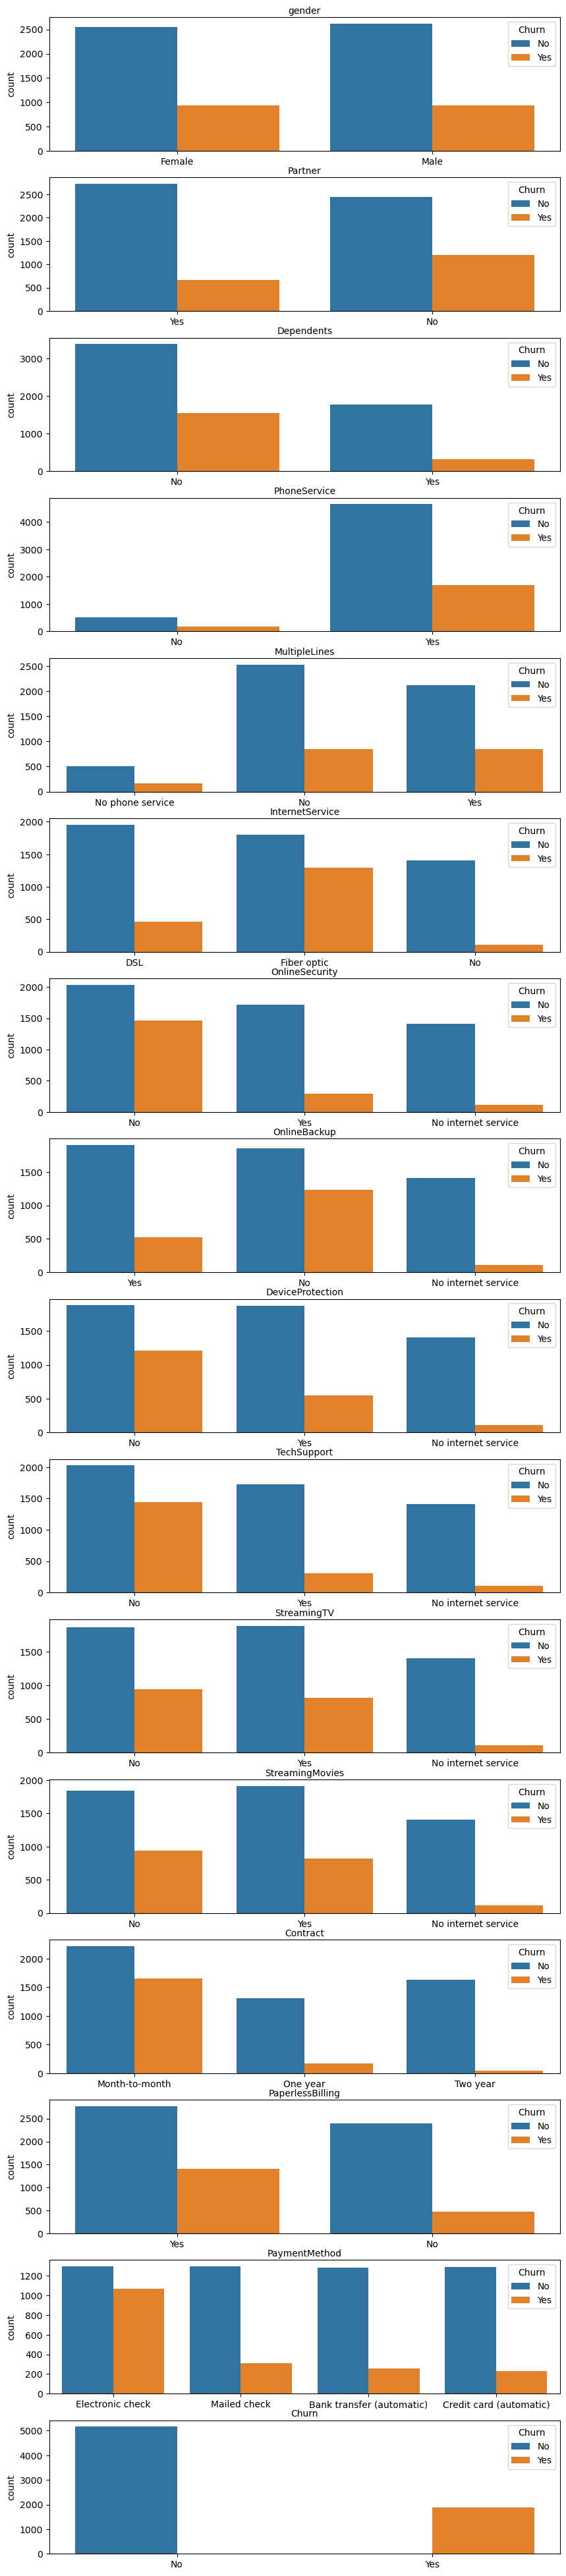

In [15]:
fig, ax =plt.subplots(categorical_columns.__len__(),1,figsize=(10, 50))
for idx,cat_col_name in enumerate(categorical_columns): 
    sns.countplot(data=df, x=cat_col_name, hue="Churn", ax=ax[idx])
    ax[idx].xaxis.set_label_position('top') 

For the numerical columns, a pairplot could be a good way of doing an initial exploration:

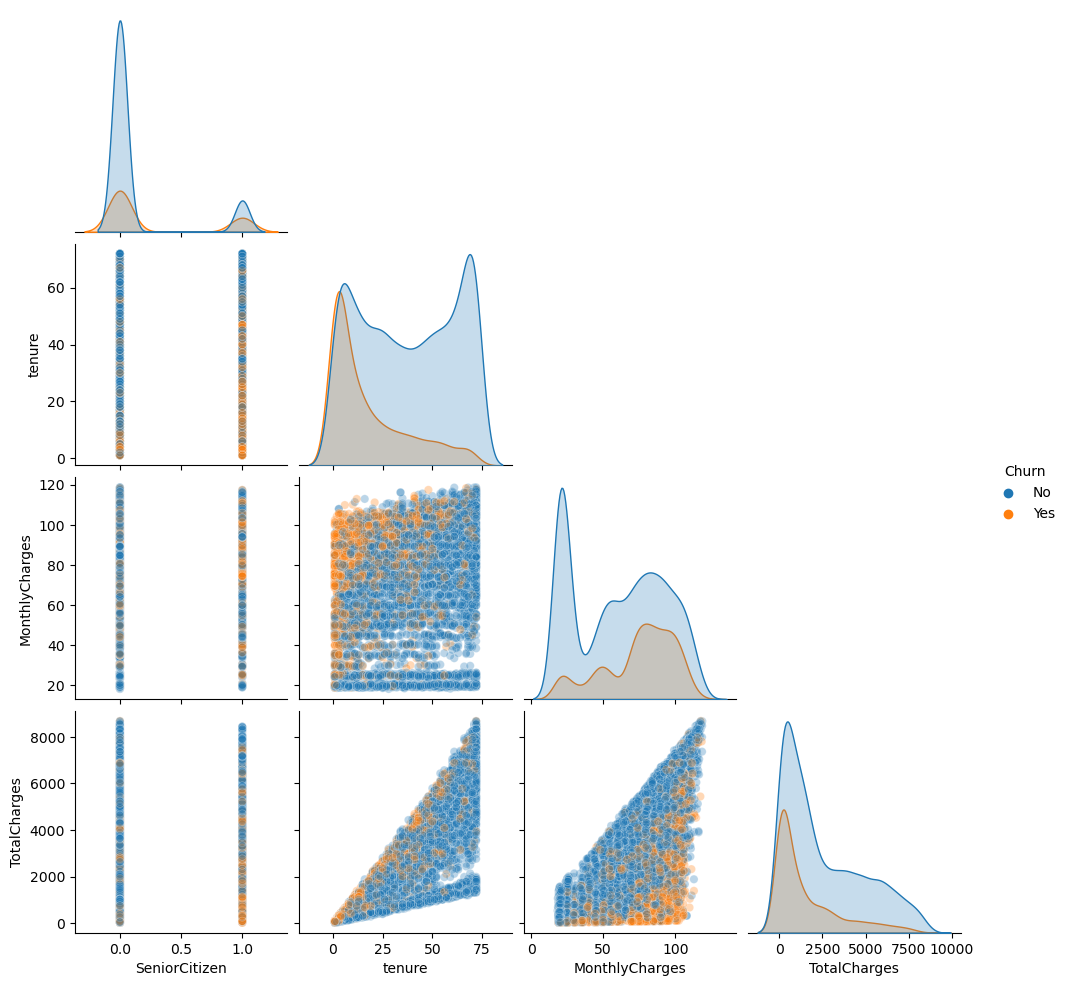

In [ ]:
sns.pairplot(df, hue="Churn",corner=True,  kind='scatter', plot_kws={'alpha':0.3})

We can see that although the "SeniorCitizen" column is numerical, in reality it is a categorical columns encoded as 0/1.